# Vehicle Crashes in Maryland from January 2015 through September 2022

### Introduction :

According to the National Safety Council report, approximately 38,300 people were killed and about 4.4 million injured in the road accidents United States in 2015. There are a variety of reasons that contribute to accidents. Some of the reasons are adverse Weather and Traffic conditions that cause accident prone situations. Predicting likelihood of vehicular crashes due to the effect of Weather and Traffic features would be a major step towards achieving better road safety.

- There was an average of 115,555 car accidents each year in Maryland over a five-year period. 
- Baltimore accounted for an average of 36.5 percent of all Maryland car accidents during the same five-year timeframe. 

### Datasets :


Dataset - 1(Crash data for Maryland from January 2015 through September 2022):
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

Dataset -2 (Maryland Statewide Vehicle Crashes - Vehicle Details): 
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf



### Dataset - 1 : Vehicle Crash Data

### Source :

"Open Data Portal" of Maryland. Does not violate any laws to download the file. This is public and real time data set.

- Rows : 849K
- Cols : 56
- Size : ~500 MB


In [7]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing
import matplotlib.pyplot as plt  # For data visualization
import re # For Regular Expression
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

In [8]:
pd.set_option('display.max_rows', None) # Diplay max rows in notebook
pd.set_option('display.max_columns', None) # Diplay max rows in notebook

In [9]:
#Importing the data file from folder 

df_v = pd.read_csv("C:\\Users\\diksh\\Downloads\\Maryland_Statewide_Vehicle_Crashes.csv", low_memory=False)


In [10]:
#checking the columns
df_v.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Counties'

In [11]:
# Number of rows and columns
df_v.shape

(848804, 56)

In [12]:
# First 5 rows of the dataset
df_v.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION,Counties
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285),1763.0
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MCP2539001Y,Property Damage Crash,NaN,6.01,20220422,22:49:00,55222,No,N,N,MONTGOMERY,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095),1814.0
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE63330016,Property Damage Crash,NaN,6.01,20201027,17:50:00,NaN,No,N,N,BACOPD,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333),1763.0
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE6418003H,Property Damage Crash,NaN,6.01,20220226,12:00:00,NaN,No,N,N,BACOPD,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087),1763.0
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,Single Vehicle,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Construction Barrier,12.0,MDTA1765000Y,Property Damage Crash,NaN,6.01,20220604,03:02:00,NaN,No,N,N,MDTA,UNK,Fixed Object,9.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488),423.0


In [13]:
# Sanity Check 
#to find duplicate rows
df_v.duplicated().sum()

0

In [14]:
# describe data
df_v.describe()

,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE,Counties
count,848804.000000,848804.000000,848791.000000,0.0,635918.000000,764448.000000,848804.000000,764448.000000,645134.000000,764448.000000,764448.000000,848804.000000,848804.000000,8.488040e+05,848804.000000,848804.000000,678672.000000,760951.000000,745912.000000,671461.000000,848804.000000,848804.000000,847297.000000
mean,2018.292162,3.920314,12.758671,NaN,103.102466,2.654248,21.301865,2.650846,1.487601,1.779313,4.619523,4.335938,6.271491,2.018359e+07,3.946662,2.129694,969.321136,4.817931,63.561981,1282.173195,39.145036,-76.744918,1515.300845
std,2.222439,13.463945,7.863632,NaN,288.485994,9.991348,29.863128,9.131210,0.804584,8.547742,13.819422,14.778338,10.244158,2.220203e+04,8.571561,7.514640,1632.210201,9.263772,141.342771,1921.826956,0.310852,0.468617,579.887787
min,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.015010e+07,0.000000,0.000000,-121.000000,0.000000,0.000000,-295.000000,37.000000,-79.996100,417.000000
25%,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,6.010000,2.016111e+07,1.000000,0.000000,90.000000,0.230000,0.000000,59.000000,38.981895,-76.940341,1763.000000
50%,2018.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,2.000000,0.000000,6.010000,2.018093e+07,1.000000,0.000000,258.000000,1.650000,0.500000,355.000000,39.225461,-76.709834,1813.000000
75%,2020.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,1.000000,4.000000,4.000000,6.010000,2.020092e+07,3.000000,1.000000,912.000000,6.460000,50.000000,1666.000000,39.346254,-76.574147,1815.000000
max,2022.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,99.000000,99.000000,99.000000,99.000000,2.022093e+07,99.000000,99.000000,9922.000000,5100.000000,1000.000000,9921.000000,39.994802,-75.000000,3219.000000


In [15]:
#column types Info
df_v.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   LIGHT_CODE             848804 non-null  float64
 4   COUNTY_DESC            848791 non-null  object 
 5   COUNTY_NO              848791 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              635918 non-null  float64
 8   JUNCTION_DESC          734568 non-null  object 
 9   JUNCTION_CODE          764448 non-null  float64
 10  COLLISION_TYPE_DESC    848804 non-null  object 
 11  COLLISION_TYPE_CODE    848804 non-null  int64  
 12  SURF_COND_DESC         762078 non-null  object 
 13  SURF_COND_CODE         764448 non-null  float64
 14  LANE_CODE              645134 non-nu

In [16]:
#Number of NA values
df_v.isnull().sum() 

YEAR                          0
QUARTER                       0
LIGHT_DESC                34855
LIGHT_CODE                    0
COUNTY_DESC                  13
COUNTY_NO                    13
MUNI_DESC                848804
MUNI_CODE                212886
JUNCTION_DESC            114236
JUNCTION_CODE             84356
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            86726
SURF_COND_CODE            84356
LANE_CODE                203670
RD_COND_DESC              84356
RD_COND_CODE              84356
RD_DIV_DESC               88855
RD_DIV_CODE               84356
FIX_OBJ_DESC              45511
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             406780
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 459726
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

### Dataset - 2 : Vehicle Details

### Source :

"Open Data Portal" of Maryland. Does not violate any laws to download the file. This is public and real time data set.

- Rows : 1386222
- Cols : 49
- Size : ~50 MB


In [17]:
#Importing the data file from folder 

df_d = pd.read_csv("C:\\Users\\diksh\\Downloads\\Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_ (1).csv", low_memory=False)


In [18]:
df_d.head()

,SEX_DESC,SEX_CODE,CONDITION_DESC,CONDITION_CODE,INJ_SEVER_DESC,INJ_SEVER_CODE,REPORT_NO,OCC_SEAT_POS_DESC,OCC_SEAT_POS_CODE,PED_VISIBLE_DESC,PED_VISIBLE_CODE,PED_OBEY_DESC,PED_OBEY_CODE,PED_TYPE_DESC,PED_TYPE_CODE,PED_LOCATION_CODE,MOVEMENT_DESC,MOVEMENT_CODE,PERSON_TYPE_DESC,PERSON_TYPE,ALCOHOL_TEST_DESC,ALCOHOL_TEST_CODE,ALCOHOL_TESTTYPE_DESC,ALCOHOL_TESTTYPE_CODE,DRUG_TEST_DESC,DRUG_TEST_CODE,DRUG_TESTRESULT_DESC,DRUG_TESTRESULT_CODE,BAC_CODE,FAULT_FLAG_DESC,FAULT_FLAG,EQUIP_PROB_DESC,EQUIP_PROB_CODE,SAF_EQUIP_DESC,SAF_EQUIP_CODE,EJECT_DESC,EJECT_CODE,DATE_OF_BIRTH,PERSON_ID,LICENSE_STATE_CODE,CLASS,CDL_FLAG_DESC,CDL_FLAG,VEHICLE_ID,EMS_UNIT_LABEL,AIRBAG_DEPLOYED,YEAR,Quarter
0,Female,F,Apparently Normal,1.0,No Injury,1,AE59920005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,False,N,Not Applicable,0.0,Not Applicable,0.0,Not Applicable,0.0,19901109,53cfb29a-b39b-4af2-85df-cf88d7215e79,MD,C,False,False,eacd0575-64e1-44f9-bd53-16449620c109,NaN,0.0,2017,Q2
1,Male,M,NaN,NaN,Non-incapacitating Injury,2,DA40650004,Right Front Seat,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occupant,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,19940925,cb90b978-e091-4422-9ead-684355d3f4a8,NaN,NaN,NaN,NaN,ac456b44-041f-4a85-bedd-1a75fd5ff81a,A,1.0,2017,Q2
2,Female,F,NaN,NaN,Possible Incapacitating Injury,3,ZU7729000P,Center Rear Seat,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occupant,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,09-JUL-94,c56e2fdd-fa91-4d49-bae9-aa1e9b51efbd,NaN,NaN,NaN,NaN,1b1906ca-09cb-4018-9273-9f215cb5d5d3,A,1.0,2016,Q2
3,Male,M,NaN,NaN,No Injury,1,CT8278002X,Right Rear Seat,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occupant,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,20090921,aa15e7f7-e40e-4fdb-aedb-a966c71c7bc8,NaN,NaN,NaN,NaN,1cd6afef-9669-41a2-acd2-dee9af76f2c4,NaN,1.0,2018,Q3
4,Female,F,Apparently Normal,1.0,No Injury,1,DA3660000B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver,D,Not Applicable,0.0,NaN,NaN,Not Applicable,0.0,NaN,NaN,NaN,True,Y,No Misuse,1.0,Shoulder/Lap Belt(s),13.0,Not Ejected/Trapped,1.0,12-JAN-56,80375a09-f4bb-4d11-88c6-c399bafcc693,DC,NaN,False,False,b5e6a3b9-7e40-4d2d-98e9-ed32dee9a90c,NaN,NaN,2015,Q2


In [19]:
# Sanity Check -  to find duplicate rows

df_d.duplicated().sum()

0

In [20]:
df_d.shape #Number of Rows and columns


(1903316, 48)

In [21]:
df_d.describe() # describe data


,CONDITION_CODE,INJ_SEVER_CODE,OCC_SEAT_POS_CODE,PED_VISIBLE_CODE,PED_OBEY_CODE,PED_TYPE_CODE,PED_LOCATION_CODE,MOVEMENT_CODE,ALCOHOL_TEST_CODE,ALCOHOL_TESTTYPE_CODE,DRUG_TEST_CODE,BAC_CODE,EQUIP_PROB_CODE,SAF_EQUIP_CODE,EJECT_CODE,AIRBAG_DEPLOYED,YEAR
count,1.456354e+06,1.903316e+06,442026.000000,34222.000000,34222.000000,34222.000000,34222.000000,34222.000000,1.461290e+06,35919.000000,1.461290e+06,22842.000000,1.869094e+06,1.903316e+06,1.869094e+06,1.635850e+06,1.903316e+06
mean,1.042557e+01,1.287976e+00,7.470467,9.675793,11.154959,9.663842,21.044335,54.812578,1.574622e+00,12.639940,1.429317e+00,0.123656,1.020094e+01,2.262875e+01,2.533659e+00,4.437670e+00,2.018297e+03
std,2.880652e+01,6.678152e-01,18.507247,26.126875,29.679396,25.580356,32.649436,20.814623,1.209792e+01,31.192028,1.172157e+01,0.098121,2.892765e+01,2.963647e+01,1.239293e+01,1.729811e+01,2.204704e+00
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03
25%,1.000000e+00,1.000000e+00,3.000000,1.000000,0.000000,1.000000,5.000000,51.000000,0.000000e+00,1.000000,0.000000e+00,0.018250,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,2.016000e+03
50%,1.000000e+00,1.000000e+00,3.000000,2.000000,1.000000,1.000000,6.000000,52.000000,0.000000e+00,1.000000,0.000000e+00,0.140000,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,2.018000e+03
75%,1.000000e+00,1.000000e+00,5.000000,3.000000,2.000000,2.000000,10.880000,56.000000,0.000000e+00,1.000000,0.000000e+00,0.180000,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,2.020000e+03
max,9.900000e+01,5.000000e+00,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,9.900000e+01,1.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,2.022000e+03


In [22]:
df_d.info() #column types Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903316 entries, 0 to 1903315
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SEX_DESC               object 
 1   SEX_CODE               object 
 2   CONDITION_DESC         object 
 3   CONDITION_CODE         float64
 4   INJ_SEVER_DESC         object 
 5   INJ_SEVER_CODE         int64  
 6   REPORT_NO              object 
 7   OCC_SEAT_POS_DESC      object 
 8   OCC_SEAT_POS_CODE      float64
 9   PED_VISIBLE_DESC       object 
 10  PED_VISIBLE_CODE       float64
 11  PED_OBEY_DESC          object 
 12  PED_OBEY_CODE          float64
 13  PED_TYPE_DESC          object 
 14  PED_TYPE_CODE          float64
 15  PED_LOCATION_CODE      float64
 16  MOVEMENT_DESC          object 
 17  MOVEMENT_CODE          float64
 18  PERSON_TYPE_DESC       object 
 19  PERSON_TYPE            object 
 20  ALCOHOL_TEST_DESC      object 
 21  ALCOHOL_TEST_CODE      float64
 22  ALCOHOL_TESTTYPE_D

In [23]:
df_d.isnull().sum() #Number of NA values

SEX_DESC                  146689
SEX_CODE                  146689
CONDITION_DESC            450410
CONDITION_CODE            446962
INJ_SEVER_DESC                 0
INJ_SEVER_CODE                 0
REPORT_NO                      0
OCC_SEAT_POS_DESC        1461290
OCC_SEAT_POS_CODE        1461290
PED_VISIBLE_DESC         1869094
PED_VISIBLE_CODE         1869094
PED_OBEY_DESC            1869094
PED_OBEY_CODE            1869094
PED_TYPE_DESC            1869094
PED_TYPE_CODE            1869094
PED_LOCATION_CODE        1869094
MOVEMENT_DESC            1869094
MOVEMENT_CODE            1869094
PERSON_TYPE_DESC               0
PERSON_TYPE                    0
ALCOHOL_TEST_DESC         442026
ALCOHOL_TEST_CODE         442026
ALCOHOL_TESTTYPE_DESC    1867397
ALCOHOL_TESTTYPE_CODE    1867397
DRUG_TEST_DESC            442026
DRUG_TEST_CODE            442026
DRUG_TESTRESULT_DESC     1893745
DRUG_TESTRESULT_CODE     1893745
BAC_CODE                 1880474
FAULT_FLAG_DESC           512186
FAULT_FLAG

# Data Insights

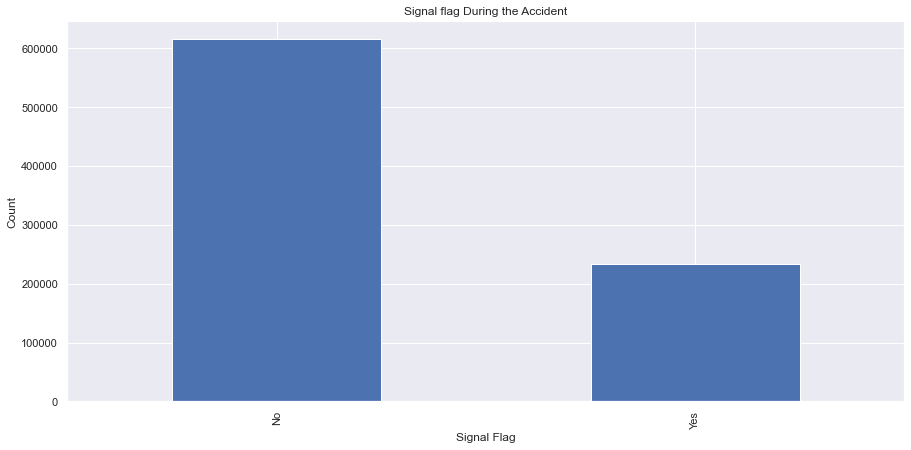

In [25]:
# Signal Flag during the accident
df_v['SIGNAL_FLAG_DESC'].value_counts().plot(kind = 'bar',figsize=(15,7))
plt.xlabel('Signal Flag')
plt.ylabel('Count')
plt.title('Signal flag During the Accident')
plt.show()

In [28]:
collision = df_v[df_v.COLLISION_TYPE_DESC != 'Unknown']

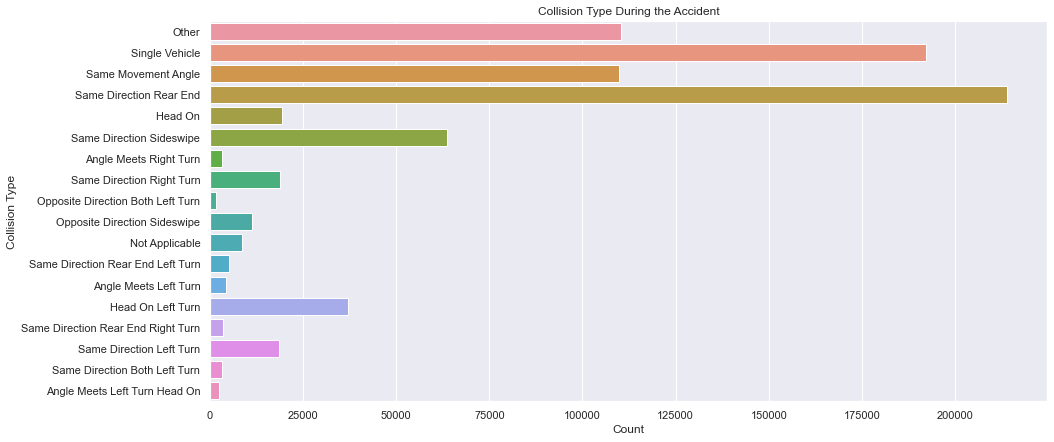

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(y = collision['COLLISION_TYPE_DESC'])
plt.title('Collision Type During the Accident')
plt.xlabel('Count')
plt.ylabel('Collision Type')
plt.show()

In [30]:
surface = df_v[df_v.SURF_COND_DESC != 'Unknown']

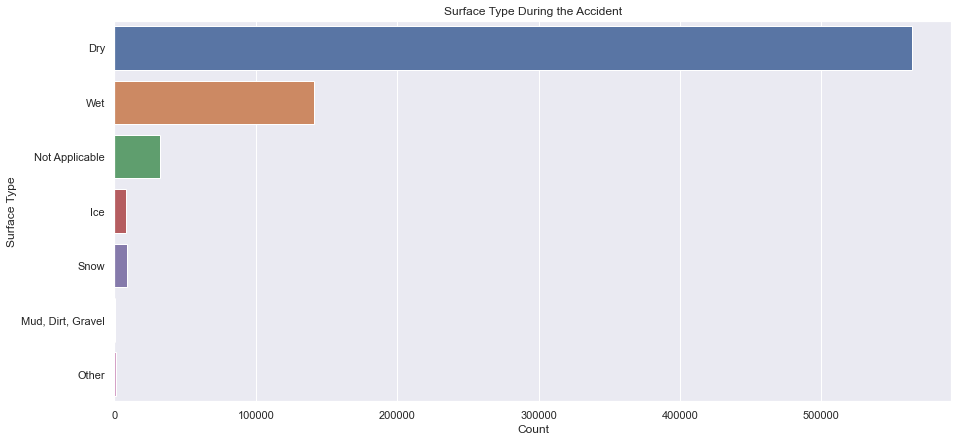

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(y = surface['SURF_COND_DESC'])
plt.title('Surface Type During the Accident')
plt.xlabel('Count')
plt.ylabel('Surface Type')
plt.show()